# Cross Validation With Multiple Algorithms


We will use credit card default data from https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format

## Step-1: Download Data

In [ ]:
import os
import urllib.request

data_url = 'https://raw.githubusercontent.com/elephantscale/datasets/master/credit-card-default/default.csv'
data_location = os.path.basename(data_url)

if not os.path.exists (data_location):
    print("Downloading : ", data_url)
    urllib.request.urlretrieve(data_url, data_location)
print('data_location:', data_location)

data_location: default.csv


In [ ]:
data = pd.read_csv(data_location)
data.sample(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
2884,2885,300000,1,2,2,36,-1,0,0,-1,...,360,257,21140,10000,10140,360,257,21346,360,0
29311,29312,10000,1,2,1,26,0,0,-2,-2,...,0,0,0,0,0,0,0,0,0,1
25059,25060,360000,1,1,1,49,-1,-1,-2,-2,...,0,5084,2500,0,0,200,5084,0,0,1
3129,3130,180000,1,1,2,29,0,0,0,0,...,105327,107500,105614,3500,4000,8600,4000,0,8100,0
9623,9624,30000,2,3,2,23,-1,-1,-1,-1,...,916,3091,700,913,10773,916,3091,700,0,0
21635,21636,80000,2,2,2,23,1,2,2,2,...,23092,24806,24272,0,3000,0,2100,0,1500,1
23788,23789,50000,2,3,1,53,1,2,0,0,...,15988,16718,17446,0,6200,2000,1000,1000,1000,0
905,906,30000,2,2,2,27,-1,-1,2,0,...,21449,29709,29086,3136,0,0,29709,0,1576,0
4986,4987,260000,2,2,2,29,-2,-2,-1,0,...,7235,0,197,0,9576,29,0,197,568,0
19664,19665,210000,2,2,2,37,0,0,0,0,...,44624,43339,44245,5000,28008,15000,1552,1605,1615,0


## Step-2: EDA

In [ ]:
## Check data skew
data['default'].value_counts()

0    23364
1     6636
Name: default, dtype: int64

In [ ]:
data['default'].value_counts(normalize=True)

0   0.78
1   0.22
Name: default, dtype: float64

## Step-3: Clean up 

TODO

## Step-4: Shape data

In [ ]:
label_col = 'default'

feature_columns = data.columns
## TODO : drop 'ID' and 'default' columns
feature_columns = feature_columns.drop (['ID', 'default'])
#print (feature_columns)

In [ ]:
X = data[feature_columns]
y = data[[label_col]]

print (X.shape)
print (y.shape)

(30000, 23)
(30000, 1)


## Step-5: Cross Validation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from pprint import pprint

## Choose models, we want to compare
## TODO: Here are we are choosing 'default' models
## What if we choose the 'best of' for each model
## See 'hyper-1' notebook for how to get the best model :-) 

models = []
models.append(('LR', LogisticRegression(max_iter=500)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('SVM', SVC()))
#models.append(('NB', GaussianNB()))


results = []
names = []
## for classification tasks
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
## for regression tasks
#scoring_metrics = ['r2', 'rmse']
y2 = np.ravel(y)
for name, model in models:
    print ('\n========= ', name , ' =========')
    kfold = KFold(n_splits=10)
    
    ## cv can be int or kfold
    cv_results = cross_validate(model, X, y2, cv=5, scoring=scoring_metrics, n_jobs=-1)
    pprint (cv_results)
    # cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring_metric)
    this_result = cv_results['test_accuracy']
    results.append(this_result)
    names.append(name)
    print("\n{}: accuracy : avg={:,.2f}, median={:,.2f},  std={:,.2f},  cv_results={}".format (
        name, np.mean(this_result), np.median(this_result), np.std(this_result), this_result))



=========  LR  =========
{'fit_time': array([0.7579782 , 0.8052516 , 0.7479105 , 0.72895026, 0.44614387]),
 'score_time': array([0.0333674 , 0.03129983, 0.02921677, 0.03366518, 0.02102566]),
 'test_accuracy': array([0.7785    , 0.77883333, 0.77883333, 0.77883333, 0.77883333]),
 'test_f1': array([0., 0., 0., 0., 0.]),
 'test_precision': array([0., 0., 0., 0., 0.]),
 'test_recall': array([0., 0., 0., 0., 0.]),
 'test_roc_auc': array([0.61366839, 0.63234875, 0.66264763, 0.65998672, 0.65131902])}

LR: accuracy : avg=0.78, median=0.78,  std=0.00,  cv_results=[0.7785     0.77883333 0.77883333 0.77883333 0.77883333]

=========  KNN  =========
{'fit_time': array([0.02388453, 0.02313805, 0.01485014, 0.01418591, 0.01403856]),
 'score_time': array([10.65246964, 11.04957819, 10.55336761, 10.80297995,  6.42836285]),
 'test_accuracy': array([0.7495    , 0.74966667, 0.752     , 0.76133333, 0.763     ]),
 'test_f1': array([0.23666836, 0.22816033, 0.26843658, 0.25726141, 0.24361702]),
 'test_precision

## Step-6: Vizualize Results

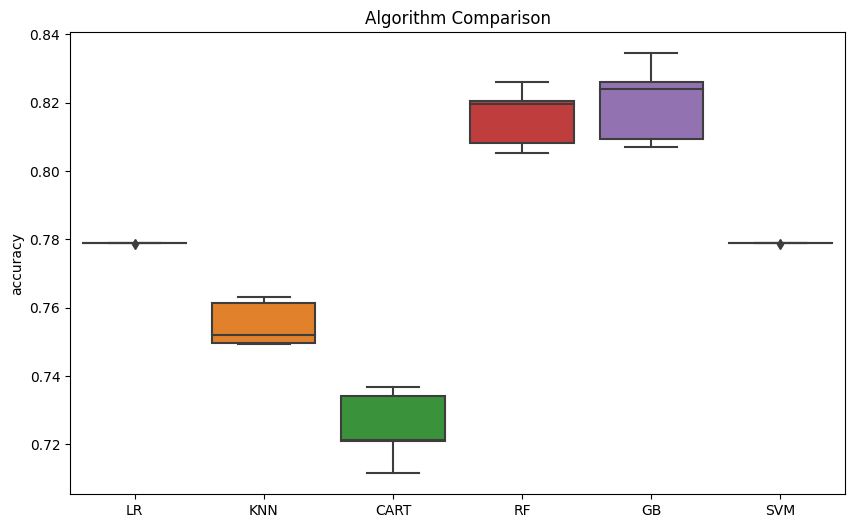

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,6))

# boxplot algorithm comparison
ax = sns.boxplot(data=results)
ax.set_title('Algorithm Comparison')
ax.set_xticklabels(names)
ax.set_ylabel('accuracy')
plt.show()